In [6]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
#Opening and reading the data file
excel_file = pd.read_excel("~/Desktop/CIA3_Data Final .xlsx")
print(excel_file)

          Date      Nifty50       Sensex      HangSI           N225     Sing  \
0   2015-12-30  7896.250000  25960.02930  21882.15039  19033.710940  2885.51   
1   2015-12-29  7928.950195  26079.48047  21999.61914  18982.230470  2888.22   
2   2015-12-28  7925.149902  26034.13086  21919.61914  18873.349610  2875.32   
3   2015-12-22  7786.100098  25590.65039  21830.01953  18886.699220  2852.97   
4   2015-12-21  7834.450195  25735.90039  21791.67969  18916.019530  2845.55   
..         ...          ...          ...          ...           ...      ...   
927 2011-03-14  5531.500000  18439.48047  22678.25000   8605.150391  3030.86   
928 2011-03-11  5445.450195  18174.08984  23345.88086   9620.490234  3043.49   
929 2011-03-10  5494.399902  18327.98047  23249.77930  10254.429690  3075.44   
930 2011-03-09  5531.000000  18469.94922  23614.89063  10434.379880  3092.90   
931 2011-03-08  5520.799805  18439.65039  23810.10938  10589.500000  3103.84   

       KOSPI  Shanghai  
0    1961.31  

In [9]:
# Few information about the main file type
excel_file.dtypes

Date        datetime64[ns]
Nifty50            float64
Sensex             float64
HangSI             float64
N225               float64
Sing               float64
KOSPI              float64
Shanghai           float64
dtype: object

In [10]:
# Descriptive statistics of the main data set
excel_file.describe()

,Nifty50,Sensex,HangSI,N225,Sing,KOSPI,Shanghai
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,6463.753439,21469.264996,22359.483837,13406.934623,3123.122951,1971.565225,2600.750021
std,1270.327521,4206.973319,2100.265149,4005.196025,199.401568,87.853623,676.128615
min,4544.200195,15175.080080,16822.150390,8165.180176,2614.450000,1652.710000,1950.010000
25%,5434.262574,18144.287597,21072.020512,9444.764893,3001.280000,1918.550000,2129.265000
50%,5961.974853,19771.090820,22541.155275,14026.189945,3140.905000,1976.475000,2326.130000
75%,7829.475098,25928.869630,23517.510257,16081.040283,3286.692500,2026.605000,2887.937500
max,8996.250000,29681.769530,28442.750000,20868.029300,3531.610000,2208.350000,5166.350000


In [11]:
excel_file.describe()
list(excel_file.columns)

['Date', 'Nifty50', 'Sensex', 'HangSI ', 'N225', 'Sing', 'KOSPI', 'Shanghai']

In [29]:
list(red_data.columns)

['Date', 'Nifty50', 'Sensex', 'HangSI ', 'N225', 'Sing', 'KOSPI', 'Shanghai']

In [28]:
# Slicing the data for regression analysis
# Excluding first and last 250 observations
# Here red_data means reduced data
red_data = excel_file.iloc[250:682,0:]
red_data

,Date,Nifty50,Sensex,HangSI,N225,Sing,KOSPI,Shanghai
250,2014-08-26,7904.750000,26442.81055,25074.50000,15521.219730,3323.02,2068.05,2209.47
251,2014-08-25,7906.299805,26437.01953,25166.91016,15613.250000,3330.28,2060.89,2207.11
252,2014-08-22,7913.200195,26419.55078,25112.23047,15539.190430,3325.50,2056.70,2229.27
253,2014-08-21,7891.100098,26360.10938,24994.09961,15586.200200,3324.09,2044.21,2240.81
254,2014-08-20,7875.299805,26314.28906,25159.75977,15454.450200,3323.65,2072.78,2230.46
...,...,...,...,...,...,...,...,...
677,2012-06-20,5120.549805,16896.63086,19265.07031,8824.070313,2855.68,1904.12,2260.88
678,2012-06-19,5103.850098,16859.80078,19518.84961,8752.309570,2842.41,1891.77,2292.88
679,2012-06-18,5064.250000,16705.83008,19416.66992,8655.870117,2824.22,1891.71,2300.80
680,2012-06-15,5139.049805,16949.83008,19427.81055,8721.019531,2811.00,1858.16,2316.05


In [14]:
# Descriptive statistics of the derived data set
red_data.describe()

,Nifty50,Sensex,HangSI,N225,Sing,KOSPI,Shanghai
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,6123.426157,20396.800239,22182.352906,12807.520196,3167.043403,1955.005556,2135.666343
std,715.277462,2470.785016,1373.161853,2554.846589,126.068496,62.151060,103.051120
min,5043.000000,16639.820310,18877.330080,8365.900391,2773.810000,1769.310000,1950.010000
25%,5672.074951,18728.192385,21522.947270,9899.477295,3065.762500,1919.737500,2050.455000
50%,5961.974853,19771.090820,22497.700195,14026.189945,3180.785000,1964.100000,2119.005000
75%,6300.349975,21176.952640,23153.329592,14848.847653,3269.357500,2000.410000,2213.622500
max,7913.200195,26442.810550,25166.910160,16291.309570,3454.370000,2082.610000,2434.480000


In [15]:
# Selecting independent and dependent variables 
x1= red_data[['N225','Sing','KOSPI']] # independent variables 
y1= red_data['Nifty50'] # dependent variable

In [16]:
#CHANGING 1D ARRAY TO 2D ARAY
x1 = red_data[['N225','Sing','KOSPI']].values.reshape(-1,3)
y1 = red_data['Nifty50'].values.reshape(-1,1)

In [17]:
# Checking the dimension of the independent variable
print (x1.ndim) 
# Checking the dimension of the dependent variable
print (y1.ndim)

2
2


In [18]:
# Printing the independent variable's values before regression analysis
x1

array([[15521.21973 ,  3323.02    ,  2068.05    ],
       [15613.25    ,  3330.28    ,  2060.89    ],
       [15539.19043 ,  3325.5     ,  2056.7     ],
       ...,
       [ 8655.870117,  2824.22    ,  1891.71    ],
       [ 8721.019531,  2811.      ,  1858.16    ],
       [ 8569.320313,  2773.81    ,  1871.48    ]])

In [19]:
# Printing the dependent variable values before regression analysis
y1

array([[7904.75    ],
       [7906.299805],
       [7913.200195],
       [7891.100098],
       [7875.299805],
       [7897.5     ],
       [7874.25    ],
       [7791.700195],
       [7739.549805],
       [7727.049805],
       [7625.950195],
       [7568.549805],
       [7649.25    ],
       [7672.049805],
       [7746.549805],
       [7683.649902],
       [7602.600098],
       [7791.399902],
       [7790.450195],
       [7830.600098],
       [7767.850098],
       [7663.899902],
       [7640.450195],
       [7624.399902],
       [7454.149902],
       [7459.600098],
       [7567.75    ],
       [7585.      ],
       [7623.200195],
       [7787.149902],
       [7751.600098],
       [7714.799805],
       [7725.149902],
       [7611.350098],
       [7508.799805],
       [7493.200195],
       [7569.25    ],
       [7580.200195],
       [7493.350098],
       [7511.450195],
       [7540.700195],
       [7558.200195],
       [7631.700195],
       [7533.549805],
       [7542.100098],
       [76

In [20]:
# Fitting the model for regression 
lr = LinearRegression() # Creating object for the class
lr.fit(x1,y1) # Performing the linear regression 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Making predictions 
y_pred = lr.predict(x1)

In [22]:
# Printing coefficients 

# Coefficient of intercept 
print('Coefficient of the intercept : ' , lr.intercept_) 

# Coefficients of independent variables
coeff_table = pd.DataFrame(lr.coef_[0] , columns=['Coefficient of the independent variables',])
coeff_table

Coefficient of the intercept :  [-6235.50338222]


,Coefficient of the independent variables
0,0.114790
1,0.640922
2,4.531411


In [23]:
# Actual and predicted values 
red_data = pd.DataFrame({'Actual' : y1.flatten(), 'Predicted': y_pred.flatten()})
print (red_data)

          Actual    Predicted
0    7904.750000  7047.150034
1    7906.299805  7029.922331
2    7913.200195  6999.370851
3    7891.100098  6947.266056
4    7875.299805  7061.322947
..           ...          ...
427  5120.549805  5236.024969
428  5103.850098  5163.319631
429  5064.250000  5140.319144
430  5139.049805  4987.295787
431  5054.750000  5006.404828

[432 rows x 2 columns]


In [24]:
print ("Mean absolute error:", metrics.mean_absolute_error(y1,y_pred))
print ("Mean squared error:", metrics.mean_squared_error(y1,y_pred))
print ("RootMean absolute error:", np.sqrt(metrics.mean_squared_error(y1,y_pred)))

Mean absolute error: 370.3426355892313
Mean squared error: 208217.34222337298
RootMean absolute error: 456.30838500226247


In [25]:
# Regression summary 
x1 = sm.add_constant(x1)
model = sm.OLS(y1,x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     207.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           5.86e-83
Time:                        22:26:08   Log-Likelihood:                -3258.2
No. Observations:                 432   AIC:                             6524.
Df Residuals:                     428   BIC:                             6541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6235.5034    803.618     -7.759      0.0

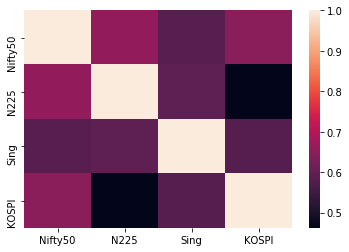

In [38]:
# Data visualisation
# Correlation map 
sns.heatmap(red_data[['Nifty50','N225', 'Sing', 'KOSPI']].corr())

Text(0.5, 1, 'Linear Regression Model Trend Line for Multiple Regression')

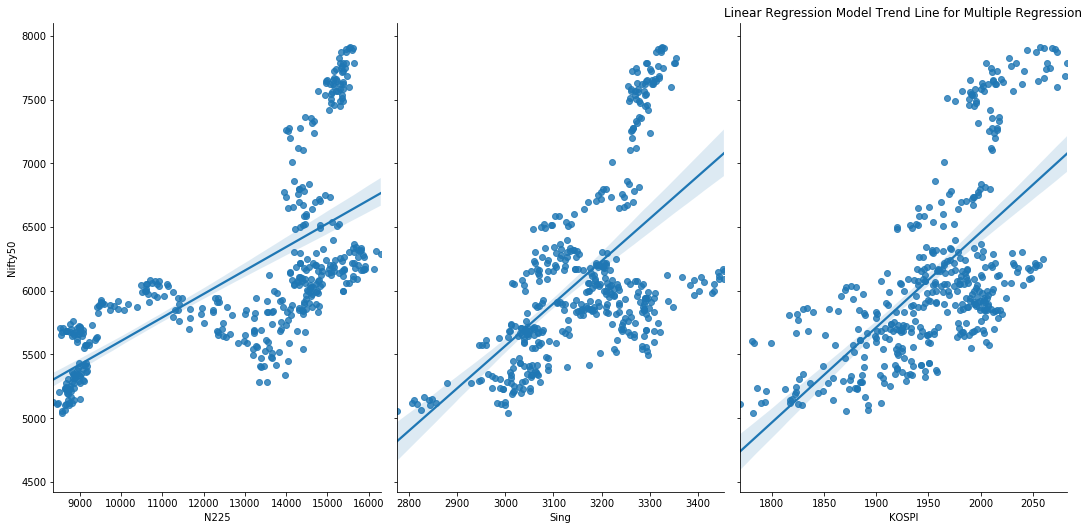

In [48]:
#Displaying the regression line 
sns.pairplot(red_data, x_vars = ['N225', 'Sing', 'KOSPI'], y_vars = 'Nifty50', height = 7, aspect = 0.7, kind = 'reg')
plt.title('Linear Regression Model Trend Line for Multiple Regression')